In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[Keras GRUCellに必要な位置引数が1つありません： 'states'](https://stackoverflow.com/questions/51254706/keras-grucell-missing-1-required-positional-argument-states)

In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/DIC/sprint24/')

In [11]:
!pip3 uninstall numpy -y

!pip3 install numpy==1.16.2
import numpy as np

Uninstalling numpy-1.16.4:
  Successfully uninstalled numpy-1.16.4
     |████████████████████████████████| 17.3MB 46.1MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


[LSTMのサンプルコード
keras/imdb_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py)

[ConvLSTM2Dのサンプルコード
keras/conv_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/conv_lstm.py)

このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。

In [3]:
'''
#Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
**Notes**
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, SimpleRNN, GRU, SimpleRNNCell, GRUCell, LSTMCell,StackedRNNCells,CuDNNGRU, CuDNNLSTM,RNN
from keras.datasets import imdb
import keras
from keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping(patience=0, verbose=1)
import keras.backend as K

Using TensorFlow backend.


In [0]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32
units = 128

In [5]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...


In [6]:
cells = [
    SimpleRNNCell(units),
    GRUCell(units),
    LSTMCell(units),
]
history=[]
model_list=[]
model_list.append(("LSTM" ,LSTM(units=units, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.2, recurrent_dropout=0.2, implementation=1, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False)))
model_list.append(("GRU" ,GRU(units=units, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=1, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False, reset_after=False)))
model_list.append(("SimpleRNN",SimpleRNN(units=units, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False)))
model_list.append(("StackedRNNCells" ,RNN(StackedRNNCells(cells))))
model_list.append(("SimpleRNNCell" ,RNN(SimpleRNNCell(units=units))))
model_list.append(("GRUCell" ,RNN(GRUCell(units=units))))
model_list.append(("LSTMCell" ,RNN(LSTMCell(units=units))))
model_list.append(("CuDNNGRU" ,CuDNNGRU(units=units, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, return_sequences=False, return_state=False, stateful=False)))
model_list.append(("CuDNNLSTM" ,CuDNNLSTM(units=units, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, return_sequences=False, return_state=False, stateful=False)))


W0627 06:23:50.322211 140561844037504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [8]:
model = Sequential()
for key,model_item in model_list:
  model = Sequential()
  model.add(Embedding(max_features, 128))
  model.add(model_item)
  model.add(Dense(1, activation='sigmoid'))
  # try using different optimizers and different optimizer configs
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  print("使用したモデル  ",key)
  print('Train...')
  history.append((key,model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=5,
                  validation_data=(x_test, y_test),
                  callbacks=[early_stopping])))
  score, acc = model.evaluate(x_test, y_test,
                              batch_size=batch_size)

  print('Test score:', score)
  print('Test accuracy:', acc)
  keras.backend.clear_session()
  model = Sequential()

使用したモデル   LSTM
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 118s 5ms/step - loss: 0.4260 - acc: 0.8041 - val_loss: 0.3570 - val_acc: 0.8441
Epoch 2/5
25000/25000 [==============================] - 117s 5ms/step - loss: 0.2618 - acc: 0.8947 - val_loss: 0.3584 - val_acc: 0.8449
Epoch 00002: early stopping
25000/25000 [==============================] - 21s 857us/step
Test score: 0.3584111510372162
Test accuracy: 0.84492
使用したモデル   GRU
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 82s 3ms/step - loss: 0.4453 - acc: 0.7855 - val_loss: 0.3548 - val_acc: 0.8449
Epoch 2/5
25000/25000 [==============================] - 82s 3ms/step - loss: 0.2488 - acc: 0.8994 - val_loss: 0.3763 - val_acc: 0.8411
Epoch 00002: early stopping
25000/25000 [==============================] - 15s 584us/step
Test score: 0.376279106760025
Test accuracy: 0.84112
使用したモデル   SimpleRNN


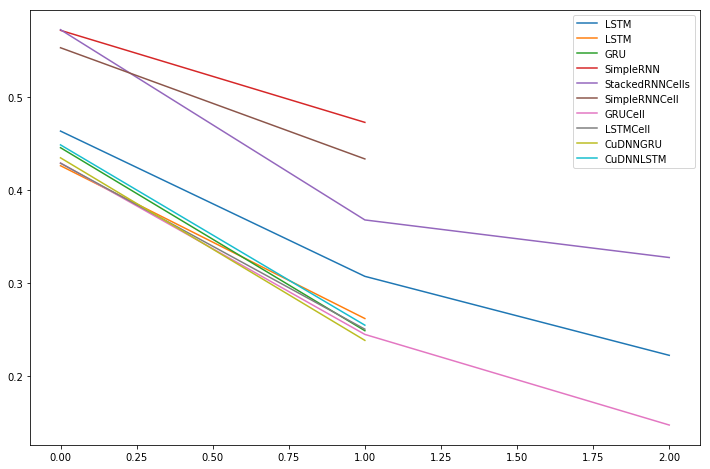

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 8)) #...1
ax = fig.add_subplot(111) #...2
for i in range(len(history)):
  ax.plot(history[i][1].history["loss"],label=history[i][0])
plt.legend()
plt.show()
  

【問題2】比較結果の説明
参考文献 [RNN：時系列データを扱うRecurrent Neural Networksとは](https://deepage.net/deep_learning/2017/05/23/recurrent-neural-networks.html)
単純なRNN系はそれほど精度が出ていない。cellを複合したStackedRNNCellsは唯一RNNの中では良い精度を出しているがそれでもLSTMの方が精度が良い。ただし構造が複雑であれば良いかと言うとそうでもなくLSTMのシンプル版のGRUの方が精度が良い。また、RNNでもcellを変更するとかなり精度が向上する。もちろん高速にチューニングされているCuDNNは速い。

RNN・・・Recurrentレイヤーに対する基底クラス　引数にcellクラスを取りモデルを生成する。  
SimpleRNN・・・Simple Recurrent Network(単純再帰型ネットワーク)は、提案者の名前から通称Elman/Jordan netと呼ばれるRNNの一種。出力が入力にフィードバックされる全結合RNN。

GRU・・・ゲートのあるリカレントユニット - Cho et al. 2014。Gated Recurrent Unit(GRU)は、LSTMをもう少しシンプルにしたモデル。入力ゲートと忘却ゲートを「更新ゲート」として１つのゲートに統合している。

LSTM・・・長短期記憶ユニット - Hochreiter 1997.
ConvLSTM2D・・・畳み込みLSTM．LSTMレイヤーに似ているが，入力の変換とリカレントな変換が畳み込み  
SimpleRNNCell・・・SimpleRNNのCellクラス．  
GRUCell・・・GRUレイヤーのためのCellクラス.  
LSTMCell・・・ LSTMレイヤーのためのcellクラス  
StackedRNNCells・・・RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー．
効率的なstacked RNNを実装するために使われます．cellをスタッキングするときに使う。  
CuDNNGRU・・・CuDNNを利用した高速なGRU実装．TensorFlowバックエンドでGPU上でのみ動作する。  
CuDNNLSTM・・・CuDNNを利用した高速なLSTM実装．
TensorFlowバックエンドでGPU上でのみ動作する．  
cuDNNはNVIDIAが公開しているDeep Learning用のライブラリである。このライブラリを使うとCaffeやChainerなどのDeep Learning用のソフトウェアの速度が向上する。 この速度向上に寄与している最も大きな部分がConvolutionの高速化である。

サンプル実装例
[KerasのconvLSTM2Dの使用例を見る](https://omedstu.jimdo.com/2018/06/29/keras%E3%81%AEconvlstm%E3%81%AE%E5%AE%9F%E8%A3%85%E3%82%92%E8%A6%8B%E3%82%8B/)

In [0]:
"""
#This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as pplt

In [0]:
# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')

In [0]:
# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

Train on 950 samples, validate on 50 samples
Epoch 1/5
950/950 [==============================] - 49s 51ms/step - loss: 7.9545e-04 - val_loss: 7.6094e-04
Epoch 2/5
950/950 [==============================] - 48s 51ms/step - loss: 5.8886e-04 - val_loss: 5.3815e-04
Epoch 3/5
950/950 [==============================] - 48s 51ms/step - loss: 4.6099e-04 - val_loss: 4.4225e-04
Epoch 4/5
950/950 [==============================] - 48s 51ms/step - loss: 4.0096e-04 - val_loss: 4.5223e-04
Epoch 5/5
950/950 [==============================] - 49s 51ms/step - loss: 3.5423e-04 - val_loss: 3.4134e-04


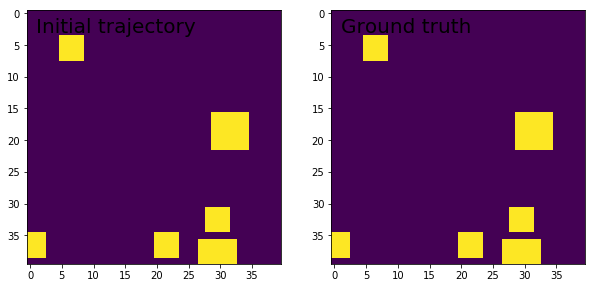

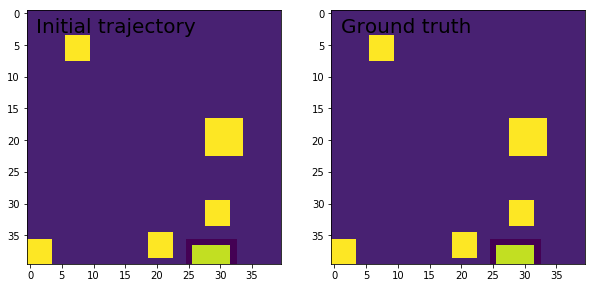

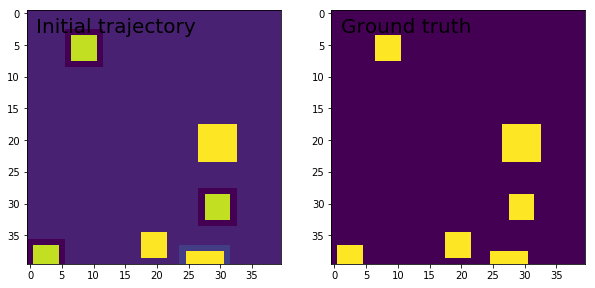

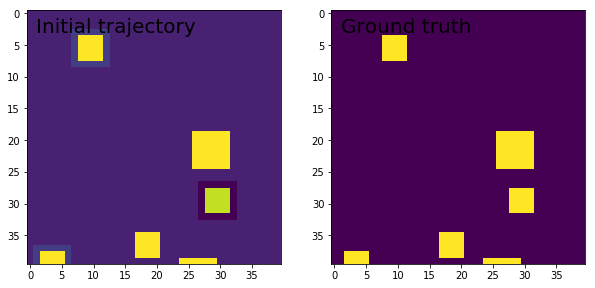

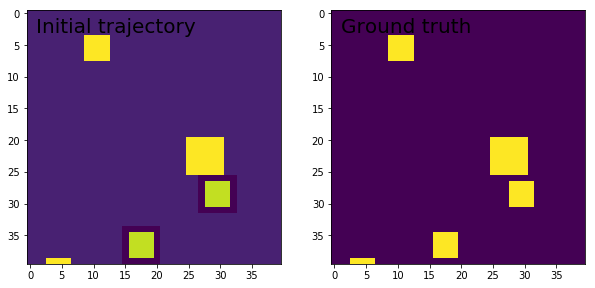

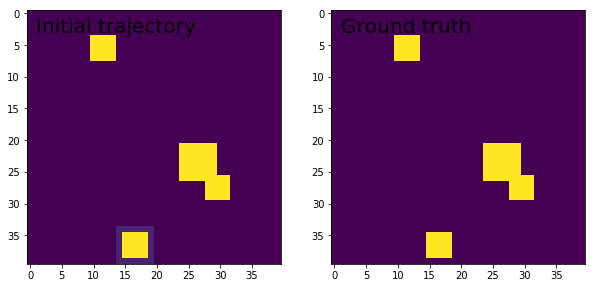

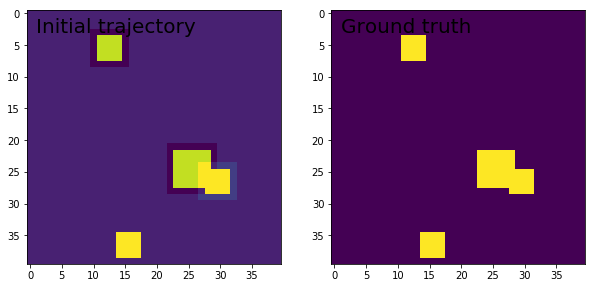

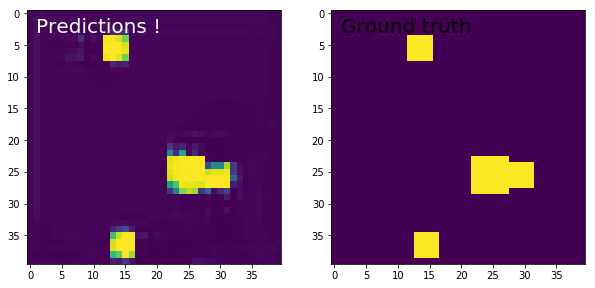

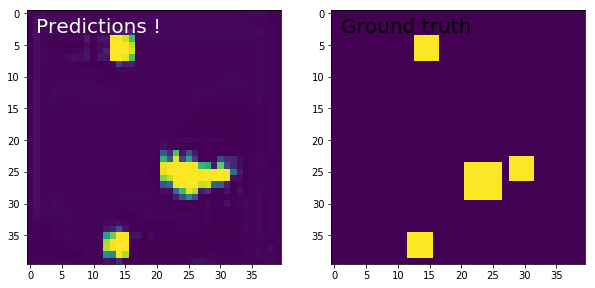

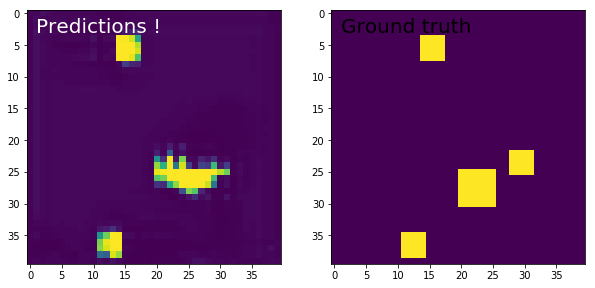

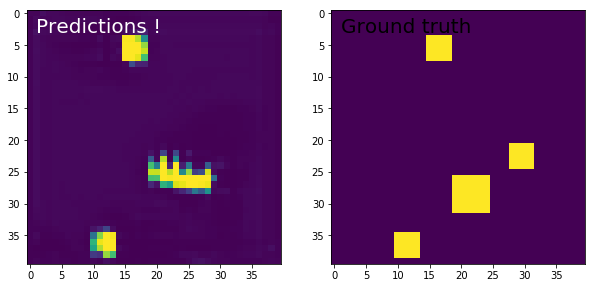

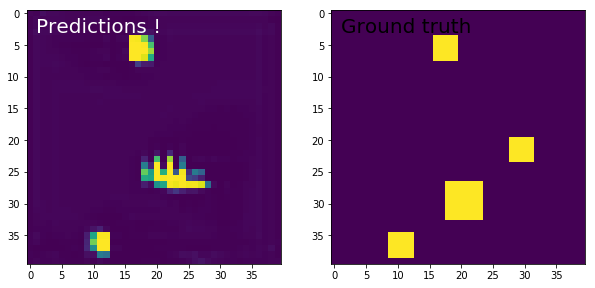

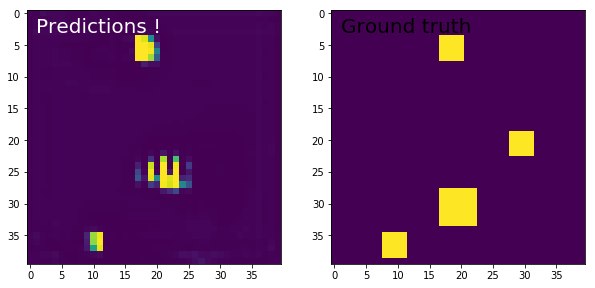

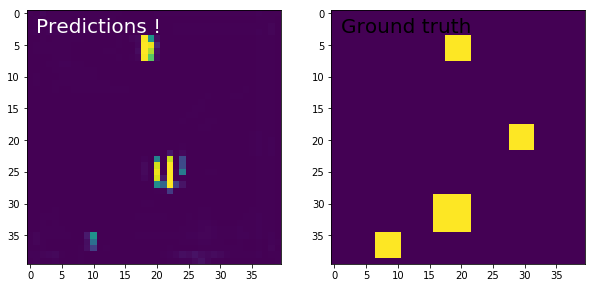

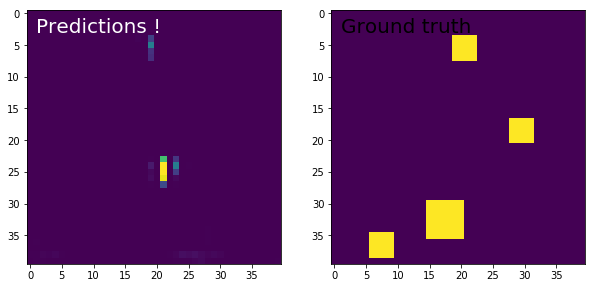

In [32]:
# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=5, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = pplt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    pplt.imshow(toplot)
    ax = fig.add_subplot(122)
    pplt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    pplt.imshow(toplot)
    pplt.savefig('%i_animate.png' % (i + 1))